In [1]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)

churn_data['Exited Title'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

display(churn_data.head())
churn_data.info()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited Title
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльный


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
 13  Exited Title     10000 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

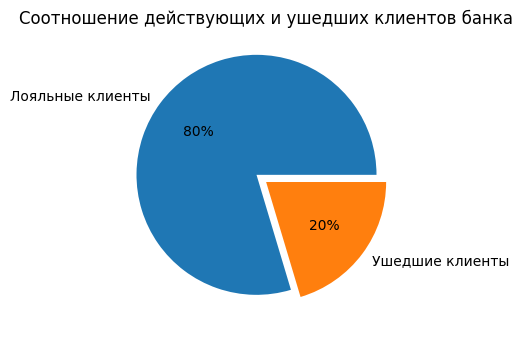

In [4]:
import matplotlib.pyplot as plt

client_ratio = churn_data['Exited'].value_counts()

def autopct_format(pct):
    return f'{int(round(pct))}%'

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    client_ratio,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct=autopct_format,
    explode = [0.1, 0]
)
axes.set_title('Соотношение действующих и ушедших клиентов банка');

Отток клиентов банка составляет 20% от общего количества клиентов в 10,000 человек.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

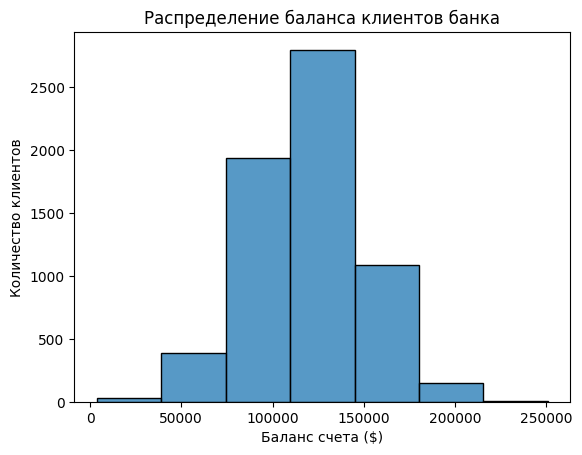

In [3]:
import seaborn as sns

filtered_balance = churn_data[churn_data['Balance'] > 2500]
balance_hist = sns.histplot(
    data=filtered_balance,
    x='Balance',
    bins=7,
)
balance_hist.set_xlabel('Баланс счета ($)')
balance_hist.set_ylabel('Количество клиентов')
balance_hist.set_title('Распределение баланса клиентов банка');

Баланс половины клиентов банка сосредоточен в пределах 75,000-140,000$.  
Около трети клиентов имеет баланс счетов менее 2500$.


30% клиентов - баланс счетов: 110,000-140,000$.  
20% клиентов - баланс счетов: 75,000-110,000$.  
15% клиентов - баланс счетов более 140,000$.  
5% клиентов - баланс счетов: 40,000-70,000$.  
30% клиентов - баланс счетов менее 2500$.  

Распределение похоже на нормальное.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

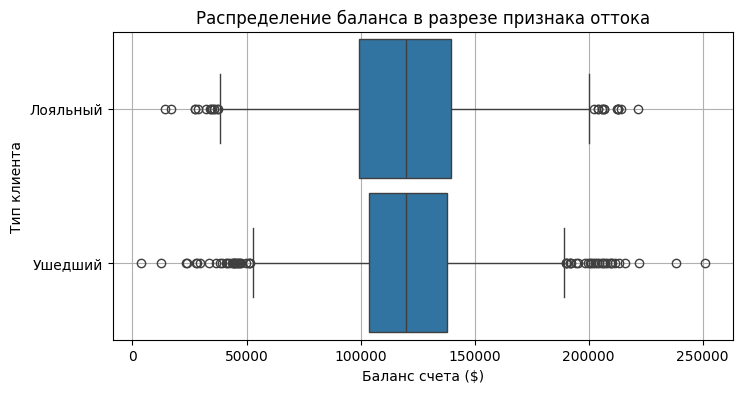

In [10]:
fig = plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(
    data=filtered_balance,
    x='Balance',
    y='Exited Title',
    orient='h',
    width=0.9
)
boxplot.set_xlabel('Баланс счета ($)')
boxplot.set_ylabel('Тип клиента')
boxplot.set_title('Распределение баланса в разрезе признака оттока');
boxplot.grid()

Распределение балансов счетов лояльных и ушедших клиентов примерно одинаковое, а медианные значения балансов обоих групп совпадют и составляют 125,000$. Т.е. причина оттока клиентов не связана напрямую с размером суммы хранимых денежных средств. Разброс распределения баланса ушедших клиентов чуть меньше и больше сконцентрирован в пределах 105,000-140,000$.  

Размер потенциальных выбросов в группе ушедших клиентов заметно больше. Это может характеризовать тот факт, что среди ушедших клиентов соотношение людей с балансами счетов менее 50,000$ и более 190,000$ больше, чем в группе лояльных клиентов, и возможно условия банка для клиентов с данными категориями балансов менее подходящие.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

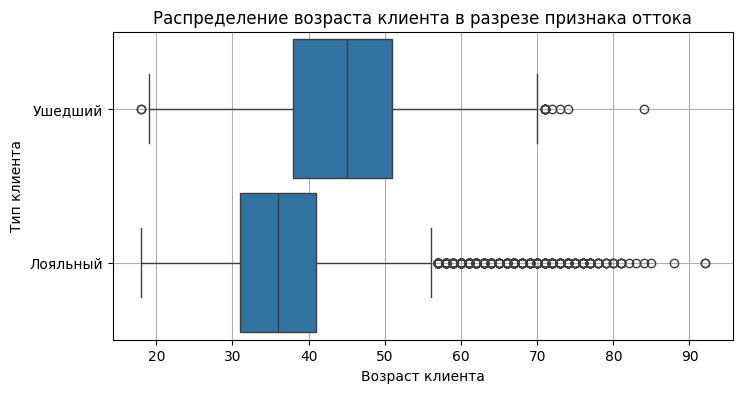

In [6]:
fig = plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited Title',
    orient='h',
    width=0.9
)
boxplot.set_xlabel('Возраст клиента')
boxplot.set_ylabel('Тип клиента')
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot.grid()

Медианный возраст ушедших клиентов старше и составляет 45 лет, в то время как медианный возраст лояльных клиентов примерно 35 лет. Разброс возраста в группе ушедших клиентов больше (20-70 лет) и смещен в более старшую группу по сравнению с разбросом возраста лояльных клиентов (18-57 лет).  

Потенциальных выбросов гораздо больше в группе лояльных клиентов. Это может характеризовать тот факт, что соотношение клиентов старшего поколения, возраст которых 60 лет и более, больше в группе лояльных клиентов.  

Таким образом, лояльные клиенты - это люди в основном более молодого возравста (30-40 лет), а также старшее поколение в возрасте более 60 лет. В то время как ушедшие клиенты - это в основном люди в возрасте 37-52 года - на эту возрастную категорию банку стоит обратить внимание.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [7]:
import plotly
import plotly.express as px

fig = px.scatter(
    data_frame=churn_data,
    x = 'EstimatedSalary', 
    y = 'CreditScore',
    color='Exited Title',
    width=950,
    height=500,
    labels={
        'EstimatedSalary': 'Предполагаемая зарплата клиента',
        'CreditScore': 'Кредитный рейтинг'
    },
    title='Взаимосвязь кредитного рейтинга и зарплаты'
)

fig.show()

Исходя из графика взаимосвязи кредитного рейтинга клиента и его предоплагаемой зарплаты можно сделать вывод, что уровень заработной платы не влияет в целом на изменение уровеня рейтинга.  
Распределение кредитного рейтинга во всех зарплатных группах примерно одинаковое, как среди лояльных, так и среди ушедших клиентов, и в основном сконцентрировано в значениях 500-800.  

Только у ушедших клиентов есть рейтинг ниже 400. 

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [8]:
bar_data = churn_data.groupby(
    by='Gender',
    as_index=False
)['Exited'].mean().round(2)

fig = px.bar(
    data_frame=bar_data,
    x="Gender",
    y="Exited",
    color='Gender', 
    text = 'Exited', 
    orientation='v', 
    height=400, 
    width=400,
    labels={
        'Gender': 'Пол клиента',
        'Exited': 'Доля ушедших клиентов'
    },
    title='Отток клиентов в зависимости от пола'
)

fig.show()

Клиенты женского пола уходят из банка чаще. Доля ушедших клиентов банка среди женщин - 25%, среди мужчин - 16%.

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [9]:
barplot_data = churn_data.groupby(
    by=['NumOfProducts', 'Exited Title'],
    as_index=False
)['Exited'].count()

fig = px.bar(
    data_frame=barplot_data,
    x="NumOfProducts",
    y="Exited",
    color='Exited Title',
    text = 'Exited', 
    orientation='v', 
    height=500, 
    width=600,
    labels={
        'NumOfProducts': 'Количество приобретенных услуг банка',
        'Exited': 'Количество клиентов',
        'Exited Title': 'Тип клиента'
    },
    title='Зависимость оттока клиентов от числа приобретённых услуг'
)

fig.show()

Большинство ушедших клиентов (70%) преобретали одну услугу банка. Также, среди ушедших клиентов, 17% преобрели 2 услуги и 10% - 3 услуги. Порядка 4% имели 4 услуги. Т.е. среди ушедших клиентов непопулярно использование более одного продукта банка.  

Примечательно, что лояльные клиенты приобретают в основном 2 услуги или 1 услугу.  

50% клиентов банка в целом приобретают одну услугу, и другие 45% - 2 услуги.  

Среди клинетов, пользующихся одной услугой количество ушедших клиентов составляет около 30%.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [10]:
bar_data = churn_data.groupby(
    by=['Exited Title', 'IsActiveMember'],
    as_index=False
)['Exited'].count()

fig = px.bar(
    data_frame=bar_data,
    x='IsActiveMember',
    y="Exited",
    color='Exited Title',
    text = 'Exited', 
    orientation='v', 
    height=500, 
    width=500,
    labels={
        'IsActiveMember': 'Статус активного клиента',
        'Exited': 'Количество клиентов',
        'Exited Title': 'Тип клиента'
    },
    title='Влияние статуса активности на отток клиентов'
)

fig.update_xaxes(
    ticktext=['Неактивный', 'Активный'],
    tickvals=[0, 1]
)

fig.show()

Среди ушедших клиентов число неактивных в два раза больше, чем активных. В то время как среди лояльных клиентов активных больше.  

Возможно банку следует разработать систему анализа/опроса неактивных клиентов, какие еще банковские услуги им могли бы быть интересны,  проанализирировать свои продукты и предложить неактивным клиентам альтернативные варианты, которые могли бы их заинтересовать и привлечь активность. Разработать линейку продуктов более ориентированных на ценности людей среднего возраста и тех продуктов, которые могли бы больше занитересовать клиентов женского пола.

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [32]:
choropleth_data = churn_data.groupby(
    by='Geography',
    as_index=False
)['Exited'].mean().round(2)

fig = px.choropleth(
    data_frame=choropleth_data,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 0.5],
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

В Герамании наибольшая доля ушедших клиентов (32%), что в два раза больше чем доля во Франции и в Испании.  

Возможно более северное положение Германии и отдаленность от побережья формирует иные преоритеты у граждан Германии, по сравнениню с жителями Франции и Испании, и существующие продукты банка им менее интересны. Возможно, немецкие банки имеют более привлекательную линейку банковских услуг.

#### 9.10.  
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.  

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.  

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

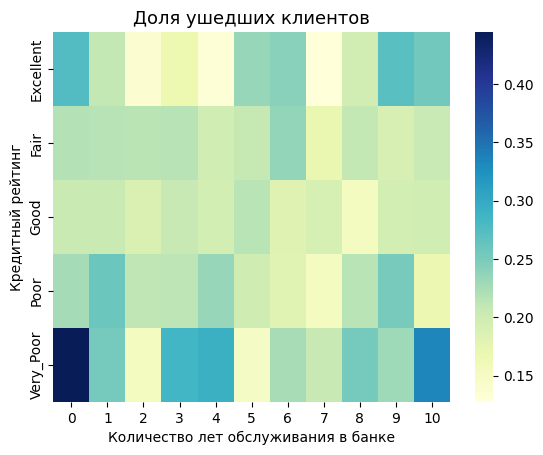

In [39]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) 

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat'
)      

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Доля ушедших клиентов', fontsize=13)
heatmap.set_xlabel('Количество лет обслуживания в банке')
heatmap.set_ylabel('Кредитный рейтинг');
 

Чаще всего из банка уходят клиенты с очень низким кредитным рейтингом, которые обслуживались в банке менее года. Около половины клиентов из этой группы покидают банк.  

Также, чаще других уходят клиенты с очень низким кредитным рейтингом, которые обслуживались в банке самое продолжительное время (10 лет). Треть клиентов из этой группы покидают банк.  

Около трети клиентов покидают банк из групп с очень низким кредитным рейтингом и временем обслуживания 3-4 года, и очень высоким кредитным рейтингом, которые обслуживались в банке менее года, либо наоборот наиболее продолжительное время (9 лет).